In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('DeepLearning.csv')
df.head(5)

,census_year,clue_small_area,Total_cafe,accommodation_and_food_services,administrative_and_support_services,agriculture_forestry_and_fishing,arts_and_recreation_services,construction,education_and_training,electricity_gas_water_and_waste_services,...,other_services,professional_scientific_and_technical_services,public_administration_and_safety,rental_hiring_and_real_estate_services,retail_trade,transport_postal_and_warehousing,wholesale_trade,total_establishments_in_block,Total_Dwel,New_cafe
0,2002,Carlton,-96.4,95.0,32.0,0.0,18.6,2.6,54.9,3.9,...,29.2,114.4,10.4,9.0,166.0,6.0,12.0,534.5,80.0,33
1,2002,Docklands,-9.6,11.5,4.8,0.2,5.4,0.8,0.9,1.8,...,2.8,5.6,5.6,2.4,11.0,21.6,1.5,73.5,850.0,26
2,2002,East Melbourne,-15.6,27.0,17.6,0.0,25.2,0.8,10.8,2.4,...,8.0,56.0,11.2,3.0,16.0,3.6,3.5,244.0,78.0,5
3,2002,Kensington,-3.2,6.0,0.8,0.0,36.0,0.4,1.8,1.2,...,1.6,4.8,2.4,1.2,7.0,3.0,11.5,84.5,81.0,0
4,2002,Melbourne (CBD),-428.8,496.5,391.2,1.4,55.2,13.6,128.7,15.9,...,121.0,1074.4,128.8,88.8,1317.0,77.4,64.0,3582.0,1452.0,0


In [33]:
df.shape

(273, 25)

In [32]:
data = df.iloc[:-1,-1]


0      33
1      26
2       5
3       0
4       0
       ..
267     0
268     0
269     0
270     0
271     0
Name: New_cafe, Length: 272, dtype: int64

In [71]:
from sklearn.svm import SVR
import warnings

In [140]:
def model_svr(parameter, X_train, X_test, y_train, y_test, pred, name):
    warnings.filterwarnings("ignore")
    model = SVR(kernel =parameter)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse =mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test,y_pred)
    print('Mean Suqared Error:',mse)
    print('R-squared',r2)
    
    value_2022 = model.predict(pred)
    if value_2022 < 0:
        value_2022 = 0
    else:
        value_2022 = value_2022.astype(int)
    print(f'The predicted number of new cafe in {name} is {value_2022}')
    plt.scatter(range(len(y_test)), y_test, color ='blue', label='Actual')
    plt.scatter(range(len(y_pred)), y_pred, color= 'red', label ='Predicted')
    plt.legend()
    plt.show()

In [222]:
def model_svr_pred(parameter, X_train, X_test, y_train, y_test, pred, name):
    warnings.filterwarnings("ignore")
    model = SVR(kernel =parameter, )
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse =mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test,y_pred)

    
    value_2022 = model.predict(pred)
    if value_2022 < 0:
        value_2022 = 0
    else:
        value_2022 = value_2022.astype(int)
    print('****-----****')
    print(f'The predicted number of new cafe in {name} is {value_2022}')
    print('Mean Suqared Error:',mse)
    print('R-squared',r2)
    return value_2022 ,mse, r2

In [226]:
def suburb_data(data, name):
    X_train = data.loc[(df['census_year']<2015)&(df['clue_small_area']==name),:].drop(columns=['census_year','clue_small_area','New_cafe'])
    y_train = data.loc[(df['census_year']<2015)&(df['clue_small_area']==name),['New_cafe']].values

    X_test= data.loc[(df['census_year']>2015)&(df['census_year']<2022)&(df['clue_small_area']==name),:].drop(columns=['census_year','clue_small_area','New_cafe'])
    y_test = data.loc[(df['census_year']>2015)&(df['census_year']<2022)&(df['clue_small_area']==name),['New_cafe']].values

    pred = data.loc[(df['census_year']==2022)&(df['clue_small_area']==name),:].drop(columns=['census_year','clue_small_area','New_cafe'])

    name = name
    return X_train, y_train,X_test,y_test,pred,name

In [ ]:
def suburb_data_scaled(data, name):
    X_train = data.loc[(df['census_year']<2015)&(df['clue_small_area']==name),:].drop(columns=['census_year','clue_small_area','New_cafe'])
    y_train = data.loc[(df['census_year']<2015)&(df['clue_small_area']==name),['New_cafe']].values
    
    X_test= data.loc[(df['census_year']>2015)&(df['census_year']<2022)&(df['clue_small_area']==name),:].drop(columns=['census_year','clue_small_area','New_cafe'])
    y_test = data.loc[(df['census_year']>2015)&(df['census_year']<2022)&(df['clue_small_area']==name),['New_cafe']].values

    pred = data.loc[(df['census_year']==2022)&(df['clue_small_area']==name),:].drop(columns=['census_year','clue_small_area','New_cafe'])

    name = name
    return X_train, y_train,X_test,y_test,pred,name

In [38]:
df['clue_small_area'].unique()

array(['Carlton', 'Docklands', 'East Melbourne', 'Kensington',
       'Melbourne (CBD)', 'Melbourne (Remainder)', 'North Melbourne',
       'Parkville', 'Port Melbourne', 'South Yarra', 'Southbank',
       'West Melbourne (Industrial)', 'West Melbourne (Residential)'],
      dtype=object)

In [127]:
# Testing the model.

In [130]:
CX_train, CY_train, CX_test, CY_test, Cpred ,Cname= suburb_data(df,'Carlton')

Mean Suqared Error: 2.5760973097093673
R-squared 0.14130089676354418
The predicted number of new cafe in Carlton is 0


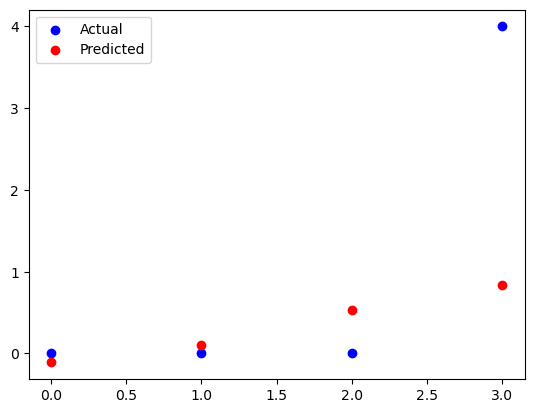

In [131]:
model_svr('rbf',CX_train, CX_test,CY_train, CY_test, Cpred, Cname)

Mean Suqared Error: 35.18097675336343
R-squared -0.12579125610762976
The predicted number of new cafe in Docklands is [0]


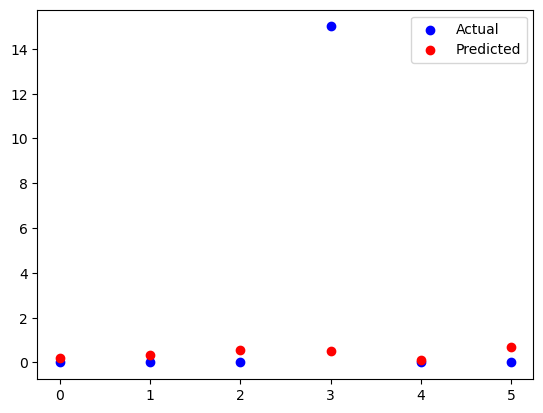

In [227]:
DX_train, DY_train, DX_test, DY_test,Dpred ,Dname = suburb_data(df,'Docklands')
model_svr('rbf',DX_train, DX_test,DY_train, DY_test,Dpred ,Dname )

Mean Suqared Error: 0.44741305465702247
R-squared 0.0
The predicted number of new cafe in East Melbourne is [0]


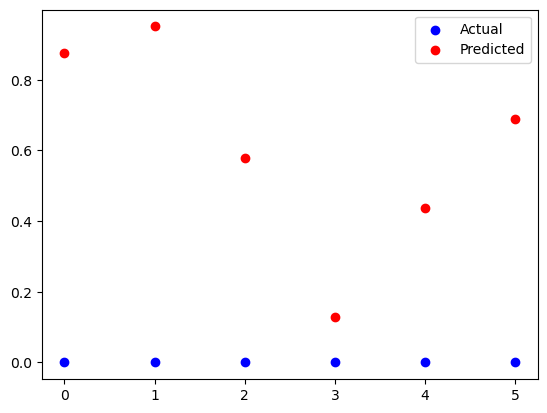

In [228]:
EMX_train, EMY_train, EMX_test, EMY_test,EMpred ,EMname = suburb_data(df,'East Melbourne')
model_svr('rbf',EMX_train, EMX_test,EMY_train, EMY_test,EMpred ,EMname )

Mean Suqared Error: 0.23281200622029982
R-squared -0.6762464447861583
The predicted number of new cafe in Kensington is [0]


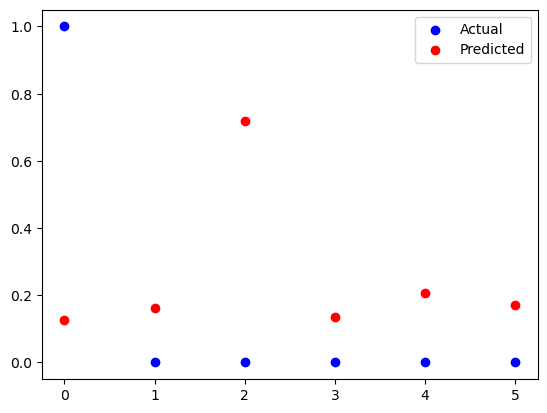

In [229]:
KX_train, KY_train, KX_test, KY_test,Kpred ,Kname  = suburb_data(df,'Kensington')
model_svr('rbf',KX_train, KX_test,KY_train, KY_test,Kpred ,Kname )

Mean Suqared Error: 5147.136587540397
R-squared -305.27589611810623
The predicted number of new cafe in Melbourne (CBD) is [74]


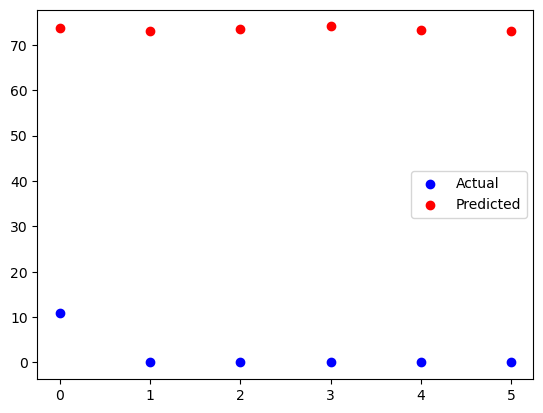

In [230]:
MX_train, MY_train, MX_test, MY_test,Mpred ,Mname  = suburb_data(df,'Melbourne (CBD)')
model_svr('rbf',MX_train, MX_test,MY_train, MY_test,Mpred ,Mname)

In [223]:
predicted=[]
mean =[]
r2=[]
suburb =[]
val=[]
array = df['clue_small_area'].unique()
for name in array:
    CX_train, CY_train, CX_test, CY_test, Cpred ,Cname= suburb_data(df,name)
    suburb.append(Cname)
    val, mean_ , r2_= model_svr_pred('rbf',CX_train, CX_test,CY_train, CY_test, Cpred, Cname)
    predicted.append(val)
    mean.append(mean_)
    r2.append(r2_)

****-----****
The predicted number of new cafe in Carlton is 0
Mean Suqared Error: 2.5760973097093673
R-squared 0.14130089676354418
****-----****
The predicted number of new cafe in Docklands is [0]
Mean Suqared Error: 51.1576642970858
R-squared -0.21262611667166342
****-----****
The predicted number of new cafe in East Melbourne is [0]
Mean Suqared Error: 0.1094204214192521
R-squared 0.0
****-----****
The predicted number of new cafe in Kensington is [0]
Mean Suqared Error: 0.16224133971319835
R-squared 0.0
****-----****
The predicted number of new cafe in Melbourne (CBD) is [64]
Mean Suqared Error: 3938.7300914187567
R-squared 0.0
****-----****
The predicted number of new cafe in Melbourne (Remainder) is [0]
Mean Suqared Error: 0.87283809303318
R-squared -0.16378412404424014
****-----****
The predicted number of new cafe in North Melbourne is [0]
Mean Suqared Error: 53.440317638810384
R-squared -0.26673345514217206
****-----****
The predicted number of new cafe in Parkville is [0]
Me

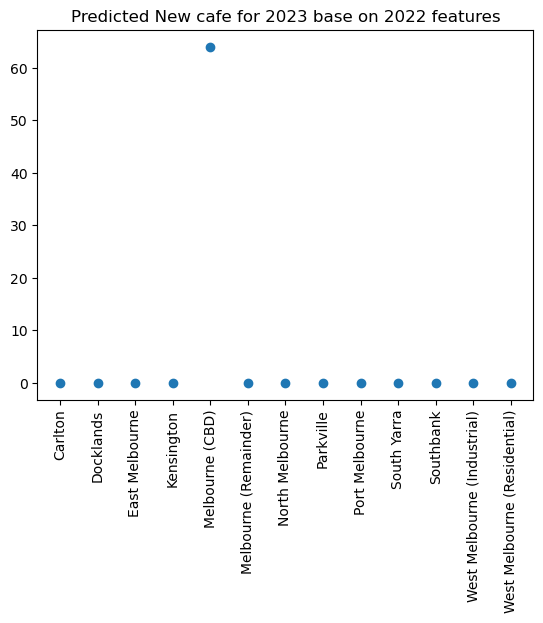

In [177]:
plt.scatter(range(len(predicted)),predicted)
plt.xticks(range(0,13),array,rotation = 90)
plt.title('Predicted New cafe for 2023 base on 2022 features')
plt.show()

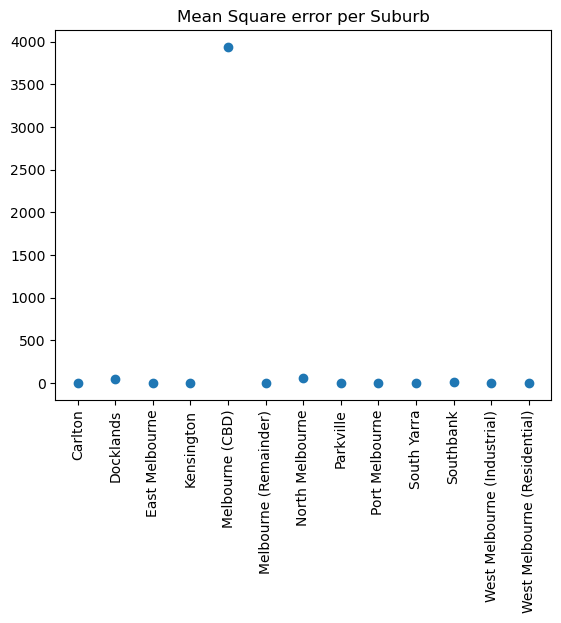

In [180]:
plt.scatter(range(len(mean)),mean)
plt.xticks(range(0,13),array,rotation = 90)
plt.title('Mean Square error per Suburb')
plt.show()

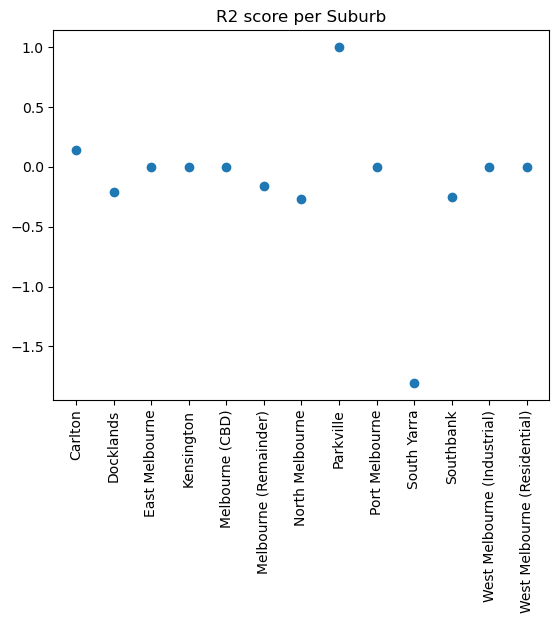

In [182]:
plt.scatter(range(len(r2)),r2)
plt.xticks(range(0,13),array,rotation = 90)
plt.title('R2 score per Suburb')
plt.showhttps://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/

https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/
<BR> Need to perform tunning

In [215]:
# Model Tunning
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 0.2,1.2,2.3, 10,11,15],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear']}  
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(CX_train, CY_train) 

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-1.376 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.033 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.105 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-1.606 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.000 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=1, kernel=linear;, score=-1.205 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=linear;, score=-8.649 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=1, kernel=linear;, score=-2.266 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=1, kernel=linear;, score=-11.247 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=1, kernel=linear;, score=-99.549 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-1.376 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 0.2, 1.2, 2.3, 10, 11, 15],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [216]:
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 15, 'gamma': 1, 'kernel': 'rbf'}
SVR(C=15, gamma=1)


In [188]:
def model_svr_best(c,gamma,parameter, X_train, X_test, y_train, y_test, pred, name):
    warnings.filterwarnings("ignore")
    model = SVR(C=c, gamma= gamma,kernel =parameter)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse =mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test,y_pred)
    print('Mean Suqared Error:',mse)
    print('R-squared',r2)
    
    value_2022 = model.predict(pred)
    if value_2022 < 0:
        value_2022 = 0
    else:
        value_2022 = value_2022.astype(int)
    print(f'The predicted number of new cafe in {name} is {value_2022}')
    plt.scatter(range(len(y_test)), y_test, color ='blue', label='Actual')
    plt.scatter(range(len(y_pred)), y_pred, color= 'red', label ='Predicted')
    plt.legend()
    plt.show()

Mean Suqared Error: 0.0
R-squared 1.0
The predicted number of new cafe in Parkville is [0]


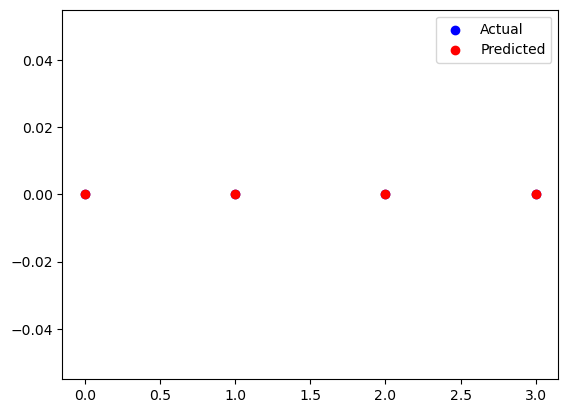

In [225]:
CX_train, CY_train, CX_test, CY_test, Cpred ,Cname= suburb_data(df,'Parkville')
model_svr_best(10,1,'rbf',CX_train, CX_test,CY_train, CY_test, Cpred, Cname)

Mean Suqared Error: 68.19749999999999
R-squared -0.6165333333333332
The predicted number of new cafe in Docklands is [8]


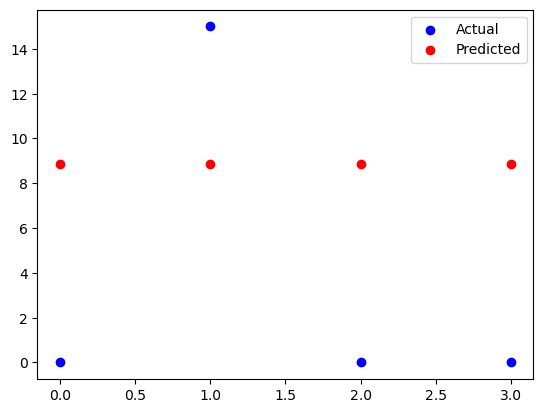

In [214]:
CX_train, CY_train, CX_test, CY_test, Cpred ,Cname= suburb_data(df,'Docklands')
model_svr_best(10,1,'rbf',CX_train, CX_test,CY_train, CY_test, Cpred, Cname)